# M5 Data Description

**Author:** Yiyang Shi


In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
pd.set_option('display.max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])


import os

# Load data
current_file = os.path.abspath("__file__")
code_dir = os.path.dirname(current_file)
data_dir = os.path.join(os.path.dirname(code_dir), "Data")


stv = pd.read_csv(os.path.join(data_dir, 'Original', 'sales_train_validation.csv'))
cal = pd.read_csv(os.path.join(data_dir, 'Original', 'calendar.csv'))
ss = pd.read_csv(os.path.join(data_dir, 'Original', 'sample_submission.csv'))
sp = pd.read_csv(os.path.join(data_dir, 'Original', 'sell_prices.csv'))
ss = pd.read_csv(os.path.join(data_dir, 'Original', 'sample_submission.csv'))

The data "sales_train_validation" provide the historical sales data each item provided by Walmart. Each row represents the number of that product being sell by x unit from d_1 to d_1969. This data also provides the product's department, category, state, and store id

In [2]:
stv.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


We can specify the row and visualize the sales trend for 1913 days

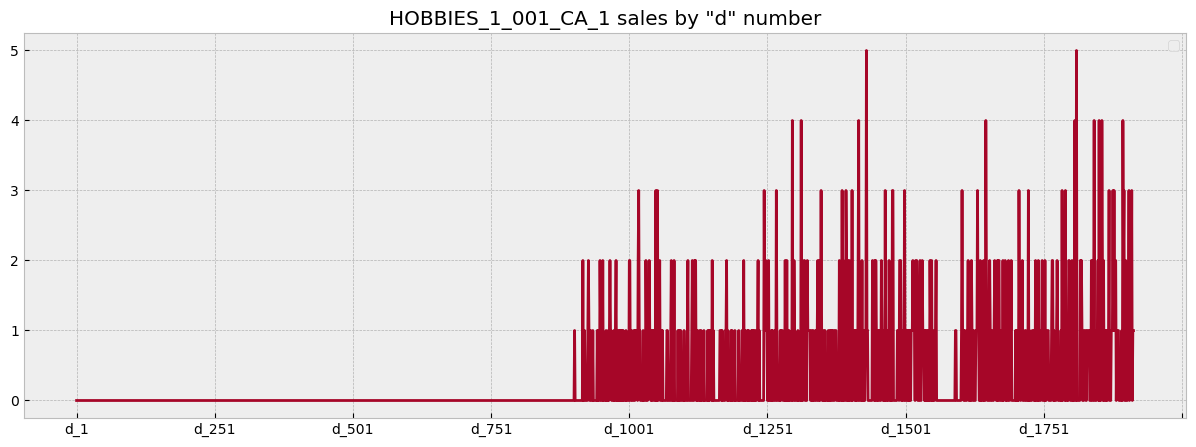

In [11]:
d_cols = [c for c in stv.columns if 'd_' in c] # sales data columns

stv.loc[stv['id'] == 'HOBBIES_1_001_CA_1_validation'] \
    .set_index('id')[d_cols] \
    .T \
    .plot(figsize=(15, 5),
          title='HOBBIES_1_001_CA_1 sales by "d" number',
          color=next(color_cycle))
plt.legend('')
plt.show()

Since we are given the calendar date data, we have additional information about special dates. For instance, turkey sales are expected to be exceptionally high on Thanksgiving. By merging the calendar date data with the sales_train_validation dataset, we can make more accurate demand predictions based on these special dates.

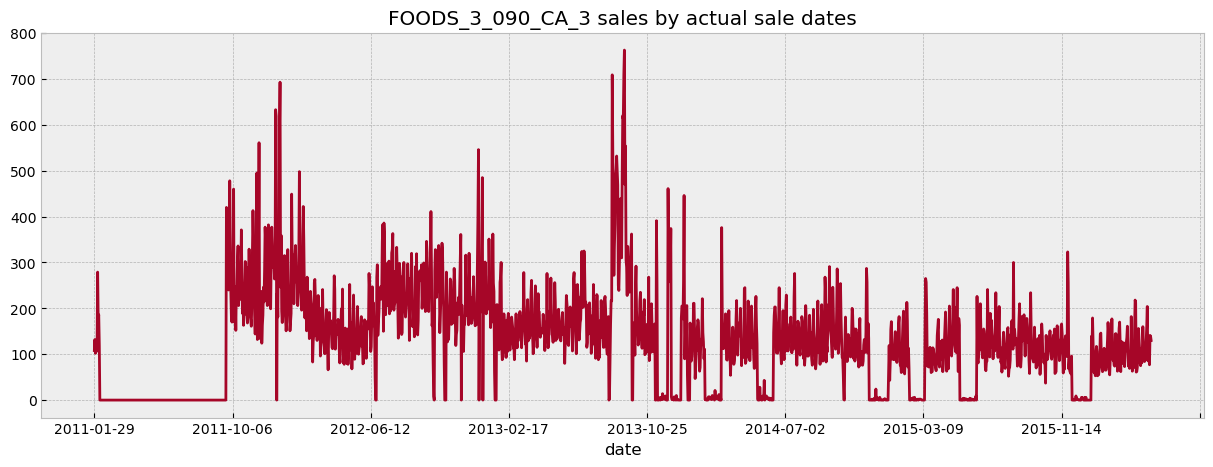

In [ ]:
# Merge calendar on our items' data
# The figure below shows the sales by date for the item FOODS_3_090_CA_3. 
example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) # Name it correctly
example = example.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example = example.merge(cal, how='left', validate='1:1')
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

### Key Points

- **2011–2013:** High volatility with frequent spikes (400–700 units) and several drops to zero. Likely due to promotions, stockouts, or new product effects.
- **2014–2016:** Sales stabilize at a lower level, rarely exceeding 200 units/day. Fewer extreme spikes.
- **Zero Sales Periods:** Recurring flatlines may indicate stockouts or missing data.

### Summary

Sales started strong and erratic, then settled into a more consistent, lower-demand phase. Data gaps or supply issues may be present.

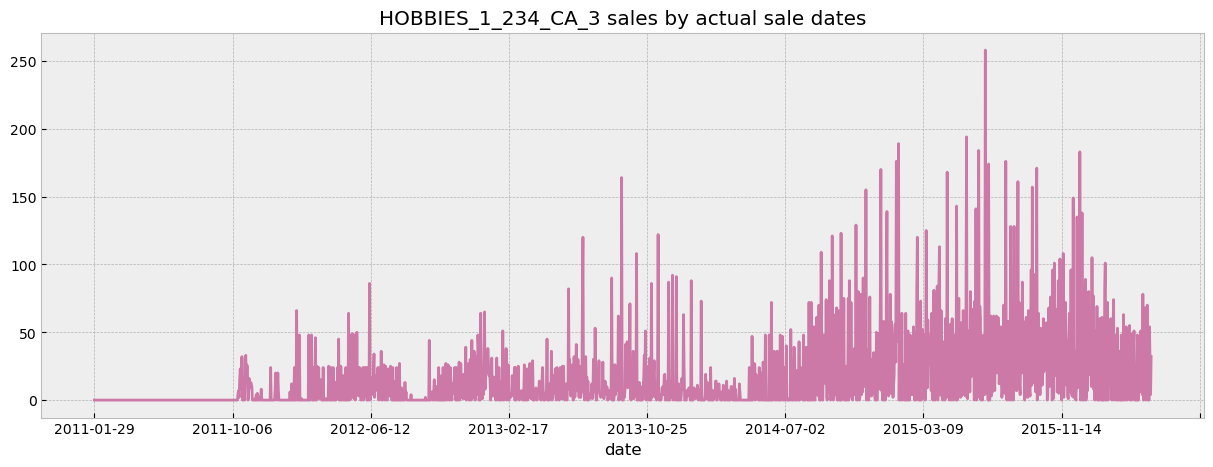

In [ ]:
# Select more top selling examples
example2 = stv.loc[stv['id'] == 'HOBBIES_1_234_CA_3_validation'][d_cols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'})
example2 = example2.reset_index().rename(columns={'index': 'd'})
example2 = example2.merge(cal, how='left', validate='1:1')

example2.set_index('date')['HOBBIES_1_234_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='HOBBIES_1_234_CA_3 sales by actual sale dates')
plt.show()


### Key Points

- Sales were minimal or zero until late 2011.
- Gradual growth began in 2012 and **sharply increased after mid-2014**, peaking around 2015.
- Post-2015, sales became more volatile but stayed relatively high.
- Overall, this item experienced **late adoption and strong growth**, with possible seasonal or event-driven spikes.

### Summary

The item gained popularity over time, with a major surge in demand from 2014 to 2015.

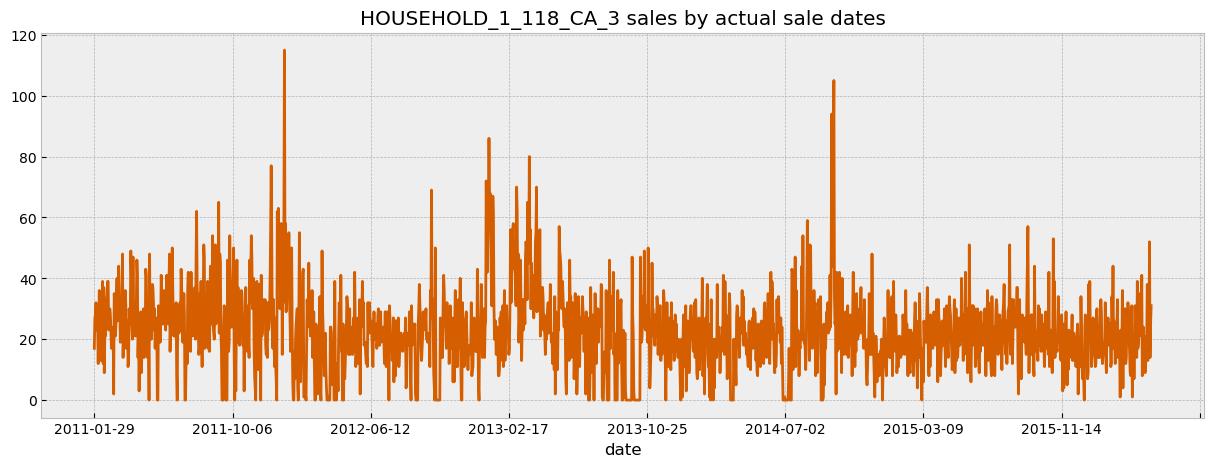

In [ ]:
example3 = stv.loc[stv['id'] == 'HOUSEHOLD_1_118_CA_3_validation'][d_cols].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3'}) 
example3 = example3.reset_index().rename(columns={'index': 'd'}) 
example3 = example3.merge(cal, how='left', validate='1:1')

example3.set_index('date')['HOUSEHOLD_1_118_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='HOUSEHOLD_1_118_CA_3 sales by actual sale dates')
plt.show()

### Key Points

- Sales are relatively stable throughout the entire period, generally ranging between 20 and 50 units.
- Occasional **spikes** (e.g., 2013, 2014, and late 2015), but no strong long-term upward or downward trend.
- **Less seasonality** compared to food or hobby items, suggesting this is a **consistent household necessity**.

### Summary

Sales remained steady over time with periodic spikes, likely due to promotions or unusual demand surges. The item shows a stable, low-volatility demand pattern.

We can also aggregate the sale by weekdays, month, and year. In this way, we can see if there's any significant trend or seasonality through out each week, month, and year. we are still pick those three items from above, as those items have outstanding sale compared to others. 

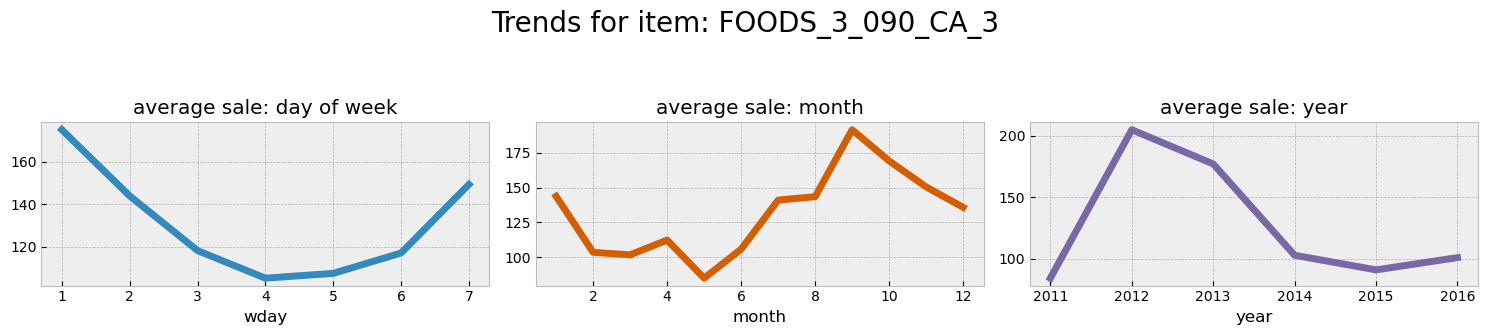

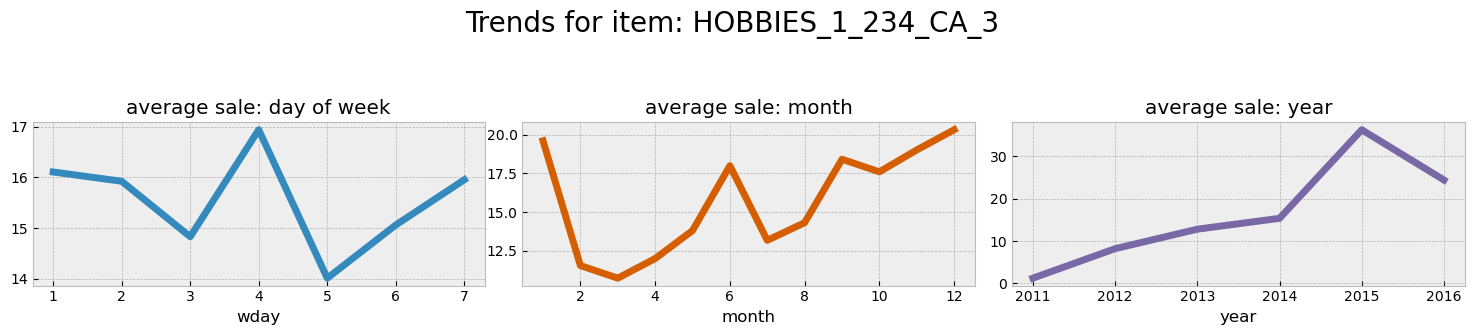

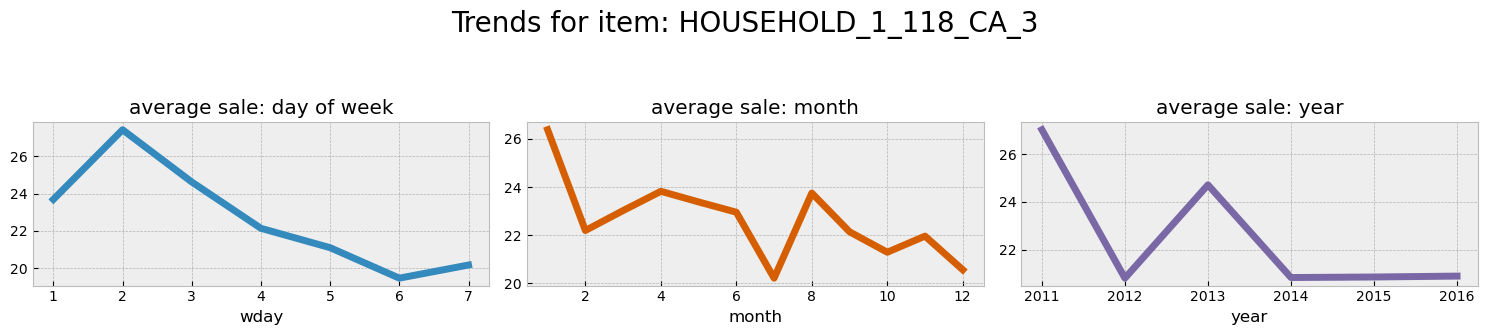

In [21]:
examples = ['FOODS_3_090_CA_3','HOBBIES_1_234_CA_3','HOUSEHOLD_1_118_CA_3']
example_df = [example, example2, example3]
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    example_df[i].groupby('wday').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    example_df[i].groupby('month').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4],

              ax=ax2)
    example_df[i].groupby('year').mean()[examples[i]] \
        .plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],

              ax=ax3)
    fig.suptitle(f'Trends for item: {examples[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

## Trends for Item: `FOODS_3_090_CA_3`

### Average Sale: Day of the Week
- **Highest sales** on **Monday (1)** and **Sunday (7)**.
- Noticeable **dip midweek**, reaching the lowest point on **Wednesday (4)**.
- Suggests this food item is **more popular at the beginning and end of the week**—possibly linked to restocking or weekend meal prep.

### Average Sale: Month
- **Peaks in September (9)**, with high values also in August.
- **Lowest in May (5)**.
- Indicates strong **seasonal demand**, likely tied to back-to-school or harvest timing.

### Average Sale: Year
- Huge **spike in 2012**, tapering off afterward.
- **Decline and stabilization** from 2014 to 2016.
- Implies early promotional success or novelty that wore off over time.


## Trends for Item: `HOBBIES_1_234_CA_3`

### Average Sale: Day of the Week
- Sales are **fairly consistent** across weekdays.
- Slight dip on **Friday (5)**.
- Suggests a **stable, non-urgent demand**, like hobby-related purchases not tied to daily routines.

### Average Sale: Month
- **Peaks in January (1)** and **December (12)**.
- **Dips in February (2)** and **March (3)**.
- Reflects **gift-giving seasons** (holidays, New Year resolutions) or seasonal hobby interest.

### Average Sale: Year
- **Steady growth** from 2011 to 2014.
- Sharp **surge in 2015**, slight decline in 2016.
- Indicates a **trend-driven product**, possibly boosted by market hype.


## Trends for Item: `HOUSEHOLD_1_118_CA_3`

### Average Sale: Day of the Week
- Highest sales on **Tuesday (2)**, lowest on **Saturday (6)**.
- Indicates more **weekday shopping behavior**, possibly related to chores or restocking habits.

### Average Sale: Month
- Relatively **stable**, with small rises in **March–April** and **August**.
- Typical of **essential or regularly consumed household items**.

### Average Sale: Year
- High in **2011**, then **flat or slightly declining**.
- Could indicate early adoption, followed by **market saturation** or steady use.


If we aggregate the sales by product type, and put them together in a line chart. 

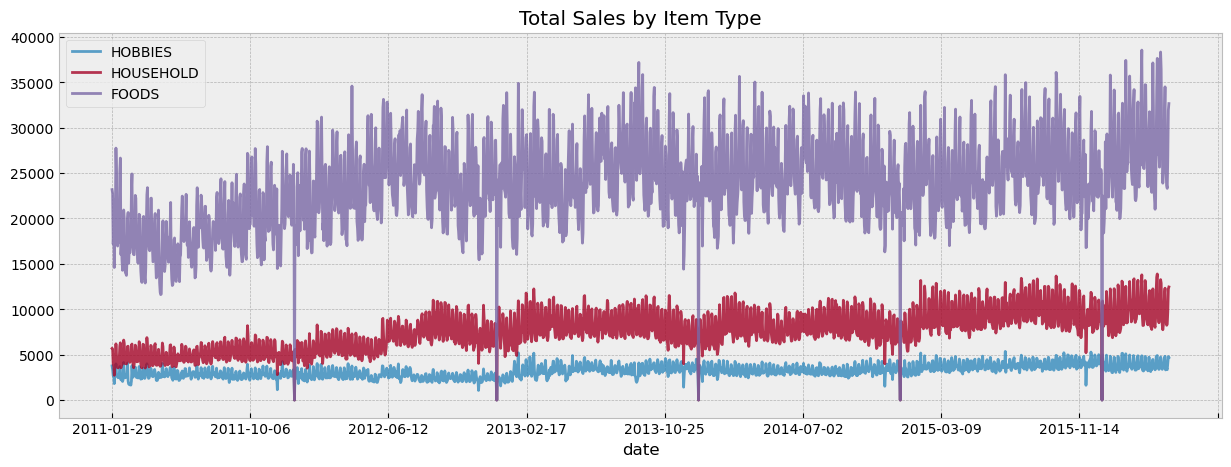

In [22]:
past_sales = stv.set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')


for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(stv['cat_id'].unique())
plt.show()

### FOODS (Purple)
- Highest total sales across all three categories throughout the time period.
- Seasonal fluctuations are clearly visible—likely weekly cycles (demand peaks and dips).
- Growth Trend: Noticeable upward trend from 2011 to around late 2013, then more stabilized until 2016.
- Dips in sales at regular intervals—could correspond to holidays or supply chain disruptions (e.g., Christmas, system updates).
- Late 2015 to 2016 shows increasing sales again—possible resurgence in demand or expansion in offerings.

### HOUSEHOLD (Red)
- Steady growth observed from 2011 to mid-2013.
- Plateaus between 2013–2015, followed by a slight increase in late 2015.
- Some weekly seasonality visible, but not as pronounced as FOODS.
- The baseline level is consistent, indicating stable demand for household goods—typical of essential items.

### HOBBIES (Blue)
- Lowest in overall sales volume, but shows a gradual increasing trend over time.
- Some periodic spikes (e.g., around holidays or gift seasons), but mostly flat with minor volatility.
- The increase from 2014 to 2016 may signal growing interest in hobby-related purchases or successful promotional campaigns.


If we aggregate the sales by store id, and put them together in a line chart. 

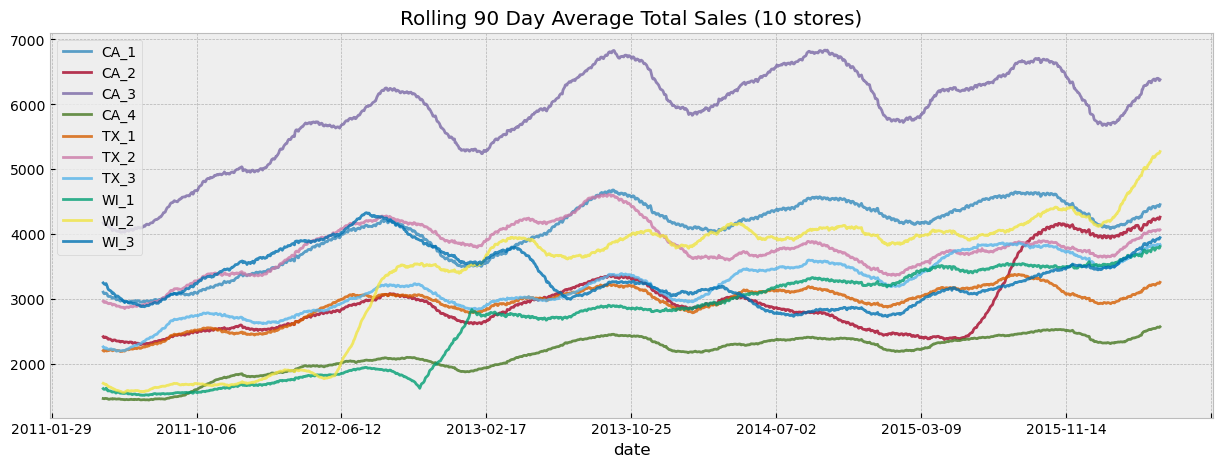

In [23]:
store_list = sp['store_id'].unique()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 90 Day Average Total Sales (10 stores)')
plt.legend(store_list)
plt.show()

### CA_3 (Purple)
- This store has consistently **the highest sales** among all 10 stores.
- Shows **strong seasonality** with regular peaks and dips, suggesting influence from cyclical demand (e.g., holidays, promotions).
- Overall trend is **upward**, especially noticeable from 2011 to 2015, with brief periods of softening.

### WI_2 (Yellow)
- Notable **rapid increase** in sales starting in 2015, surpassing most other stores by the end of the period.
- Suggests either a **successful intervention** (e.g., marketing, expansion) or changes in local demand behavior.

### WI_3 (Dark Blue)
- Steady growth until early 2013, followed by **fluctuations and minor declines**, then stabilizes in a mid-range zone.

### TX_2 and TX_3 (Pink and Light Blue)
- Both stores show **very similar growth patterns** with moderate seasonality.
- Maintain **consistent middle-tier performance**.

### CA_1 and CA_2 (Sky Blue and Red)
- Remain in the mid-to-lower range of sales.
- CA_2 shows an **upward trend after 2015**, while CA_1 stays relatively flat after peaking in 2012.

### WI_1 (Green)
- **Lowest overall performance**, though there is slight improvement from 2014 onward.
- May suggest limited demand or underperformance relative to other stores.

### TX_1 (Orange)
- Flat growth with slight seasonal effects.
- Maintains a position near the **bottom third** of sales throughout the period.

### CA_4 (Light Green)
- Gradual increase starting in 2012, followed by a **long plateau** and minor declines.
- Suggests **stable but unspectacular performance**.

## Summary Insights

- **CA_3** is a clear top performer with consistent and strong seasonality.
- **WI_2** shows a late but sharp improvement, potentially overtaking others.
- **TX_2**, **TX_3**, and **WI_3** form a stable middle group with balanced performance.
- **WI_1** and **TX_1** underperform and may require further investigation or support.